# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t 
import scipy.stats as stats
from numpy.random import seed
!pip install researchpy
import researchpy as rp
medical = pd.read_csv('insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

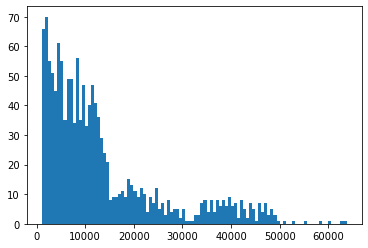

In [10]:
charge=medical['charges']
plt.hist(charge,bins=100)
plt.show()

In [6]:
np.mean(charge)

13270.422265141257

In [21]:
np.std(charge,ddof=1)

12110.011236693994

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ <b>Scenario-1 When infering from drawing random samples from current sample
    
    The data of charges does not show normal distribution. Therefore, It will be worth taking large number of  random samples of large sizes to generate sampling distribution of means to generate a approximately normal probablity distribution as stated in Central limit theorem. Later the hypothesis that actual charges have falled below 12,000 can be tested using lower tailed one sided test for confidence interval. Our null Hypothesis: Actual average charge=12000. Alternative HYpothesis: Actual average charge <12000
<b> Scenrio -2 When infering from current random sample
    
    We can calcualate the confidence interval of mean and see if 12,000 average that administrator is suspecting falls in the confidence interval of means

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ <b> At 95% confidence interval for mean, the lower bound of mean estimation is higher than 12000, so administrators should not be concerned

In [11]:
df = (len(charge)-1)
t_upper=t.ppf(0.975,df=df,loc=np.mean(charge),scale=(np.std(charge,ddof=1))/np.sqrt(len(charge)))
t_lower=t.ppf(0.025,df=df,loc=np.mean(charge),scale=(np.std(charge,ddof=1))/np.sqrt(len(charge)))
print(" The upper bound and lower bound of confidence interval of mean @95% using t-distribution \n t_upper:",t_upper,"t_lower=",t_lower)

 The upper bound and lower bound of confidence interval of mean @95% using t-distribution 
 t_upper: 13919.890496089869 t_lower= 12620.954034192644


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ In both the approaches the t-statistics is 11.89 and p-value is very small at pvalue=4.461230231620717e-31. Therefore due to very low p-value, the null hypothesis is rejected at almost full certainity
       
        

In [19]:
# Calculating the data for people with insurance and without insurance
# with insurance
cwi= medical['charges'][medical['insuranceclaim']==1]
# without insurance
cwo= medical['charges'][medical['insuranceclaim']==0]

In [32]:
cwimean=np.mean(cwi)
print(cwimean)
cwomean=np.mean(cwo)
print(cwomean)
cwistd=np.std(cwi,ddof=1)
print(cwistd)
cwostd=np.std(cwo,ddof=1)
print(cwostd)

16423.928276537663
8821.421892306294
14045.928418802127
6446.510126811736


In [58]:
(len(cwo)-1)*cwostd


3571366.610253702

In [59]:
# pooled standard deviation
ps=np.sqrt((((len(cwi)-1)*cwistd*cwistd)+((len(cwo)-1)*cwostd*cwostd))/(len(cwi)+len(cwo)-2))

In [60]:
print(ps)

11520.034268775256


In [61]:
tstat=(cwimean-cwomean)/(ps*np.sqrt((1/len(cwi))+(1/len(cwo))))
print(tstat)

11.89329903087671


In [63]:
tst=stats.ttest_ind(cwi,cwo)
print(tst)
print(tst[1])
print(1-tst[1])

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)
4.461230231620717e-31
1.0


In [52]:
rp.ttest(cwi,cwo)

(   Variable       N          Mean            SD          SE     95% Conf.  \
 0   charges   783.0  16423.928277  14045.928419  501.960531  15438.578650   
 1   charges   555.0   8821.421892   6446.510127  273.639115   8283.924817   
 2  combined  1338.0  13270.422265  12110.011237  331.067454  12620.954034   
 
        Interval  
 0  17409.277903  
 1   9358.918968  
 2  13919.890496  ,
                   Independent t-test    results
 0  Difference (charges - charges) =   7602.5064
 1              Degrees of freedom =   1336.0000
 2                               t =     11.8933
 3           Two side test p value =      0.0000
 4          Difference < 0 p value =      1.0000
 5          Difference > 0 p value =      0.0000
 6                       Cohen's d =      0.6599
 7                       Hedge's g =      0.6596
 8                   Glass's delta =      0.5413
 9                     Pearson's r =      0.3094)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ <b> Yes! the z-test can also be used. In general with sample size n>30, t-distribution  approximates  z distribution shape with more or less no difference in the statistical values. In.other words degree of freedom has little impact when sample size crosses the value of 30 

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test